# Problem Statement


- Based on the Pima Function historical data, build a machine learning binary classification model to predict if the person is diabetic or not based on below features - 

Pregnencies, Glucose, Blood Pressure, Skin Thickness, Insulin, BMI, Dibetespedigree Functions, Age

**Label** 
 
Outcome

In [33]:
# lets start with importing necessary libraries

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [6]:
# reading the data
data = pd.read_csv('D:/Files-main/Files-main/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
data.shape

(768, 9)

In [13]:
#understand data at high level, check the statistics of dataset
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


It Seems that there is no missing values in out data. Lets work on data processing:

# Data Processing

1. Data Cleaning
2. EDA (Analysis)
3. Finding and Treating Outliers (if any)
4. Feature selection and model building
5. Data Standardization

We can see there few columns Glucose, Insulin, Skin thickness, BMI and Blood Pressure which have values as 0. That's not possible. We can do quick search to see that one cannot have 0 values fro these. Let's deal with that we can either remove such data or simply replace it with their respective mea values. Let's do the letter.

In [7]:
# replacing 0 values with the mean of the column

data['Glucose'] = data['Glucose'].replace(0,data['Glucose'].mean())
data['BloodPressure'] = data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['SkinThickness'] = data['SkinThickness'].replace(0,data['SkinThickness'].mean())
data['Insulin'] = data['Insulin'].replace(0,data['Insulin'].mean())
data['BMI'] = data['BMI'].replace(0,data['BMI'].mean())

In [38]:
# Check again describe method to make sure that 0's are not present
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000
mean,3.675941,117.224996,71.545622,25.251245,91.740137,31.520840,0.414943,32.343699,0.309329
std,3.073908,28.157604,10.941346,8.221385,33.821662,6.216489,0.243653,10.942609,0.462596
min,0.000000,44.000000,44.000000,8.000000,15.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,97.000000,64.000000,20.536458,79.799479,27.000000,0.236000,24.000000,0.000000
50%,3.000000,112.000000,70.000000,20.536458,79.799479,31.600000,0.340000,28.000000,0.000000
75%,6.000000,133.000000,78.000000,31.000000,94.000000,35.300000,0.560500,39.000000,1.000000
max,12.000000,197.000000,104.000000,49.000000,196.000000,50.000000,1.191000,66.000000,1.000000


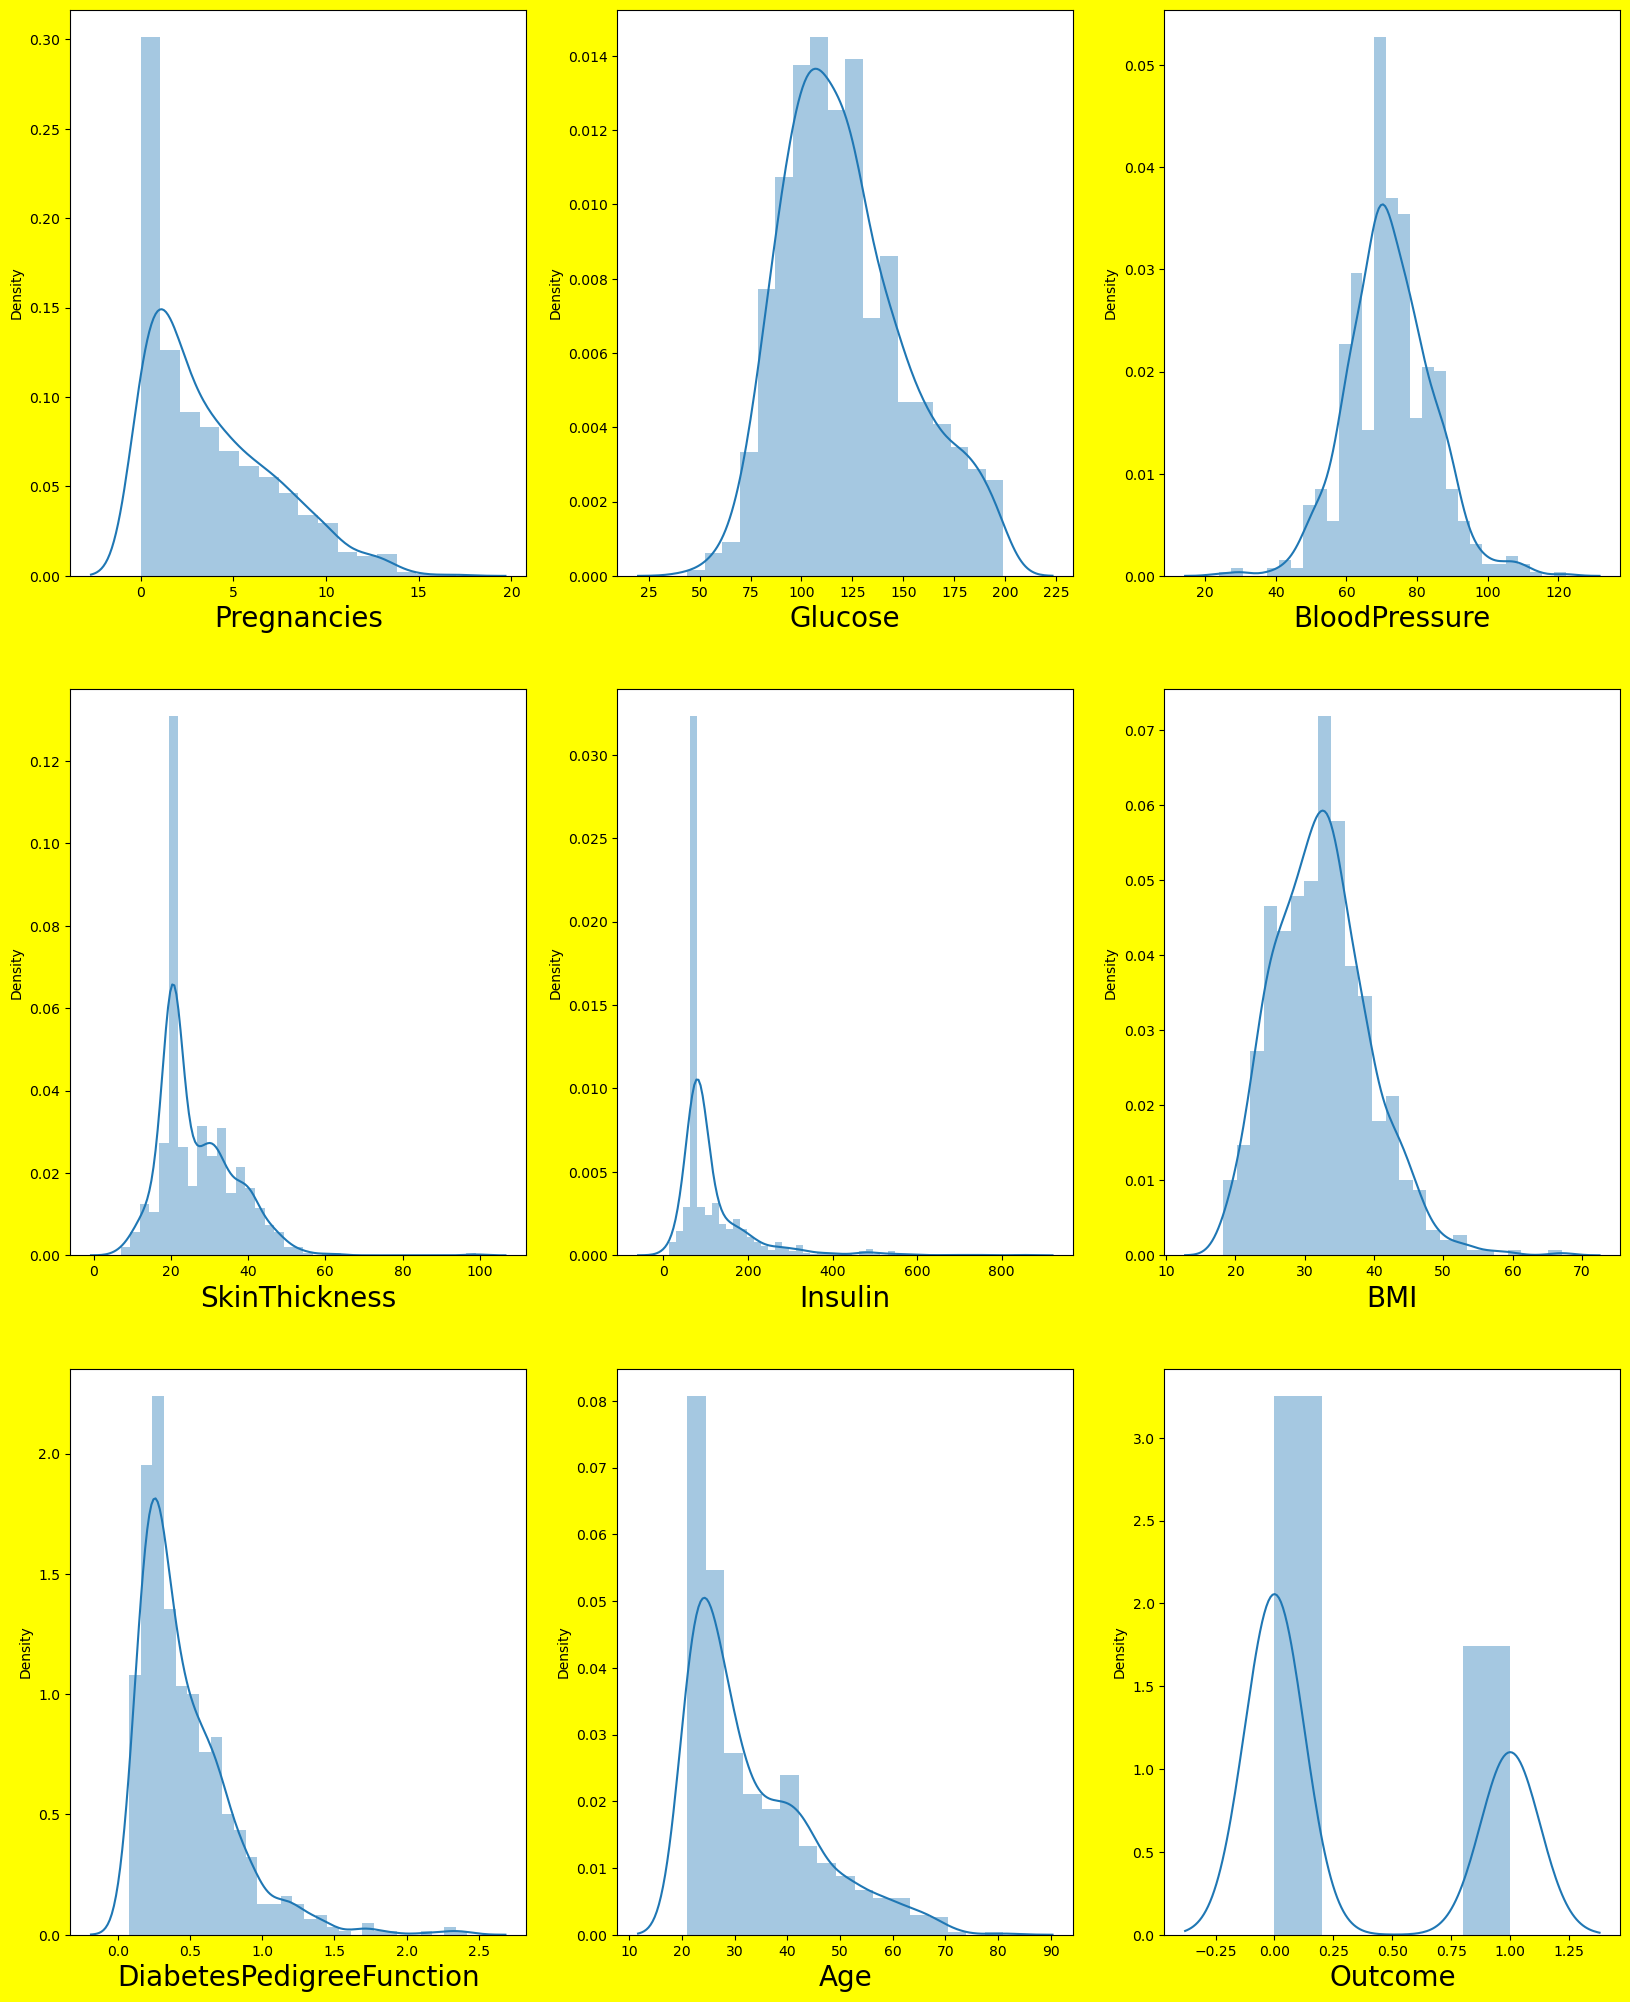

In [8]:
# Let's see how data is distributed for every column

plt.figure(figsize = (20, 25), facecolor = 'yellow')
plotnumber = 1

for column in data:
    if plotnumber <= 9: # as there are 9 column in the data
        ax = plt.subplot(3,3, plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize = 20)
    
    plotnumber += 1
plt.show()

We can see there is some skewness in the data, let's deal with that

In [9]:
df_features = data.drop('Outcome', axis = 1)

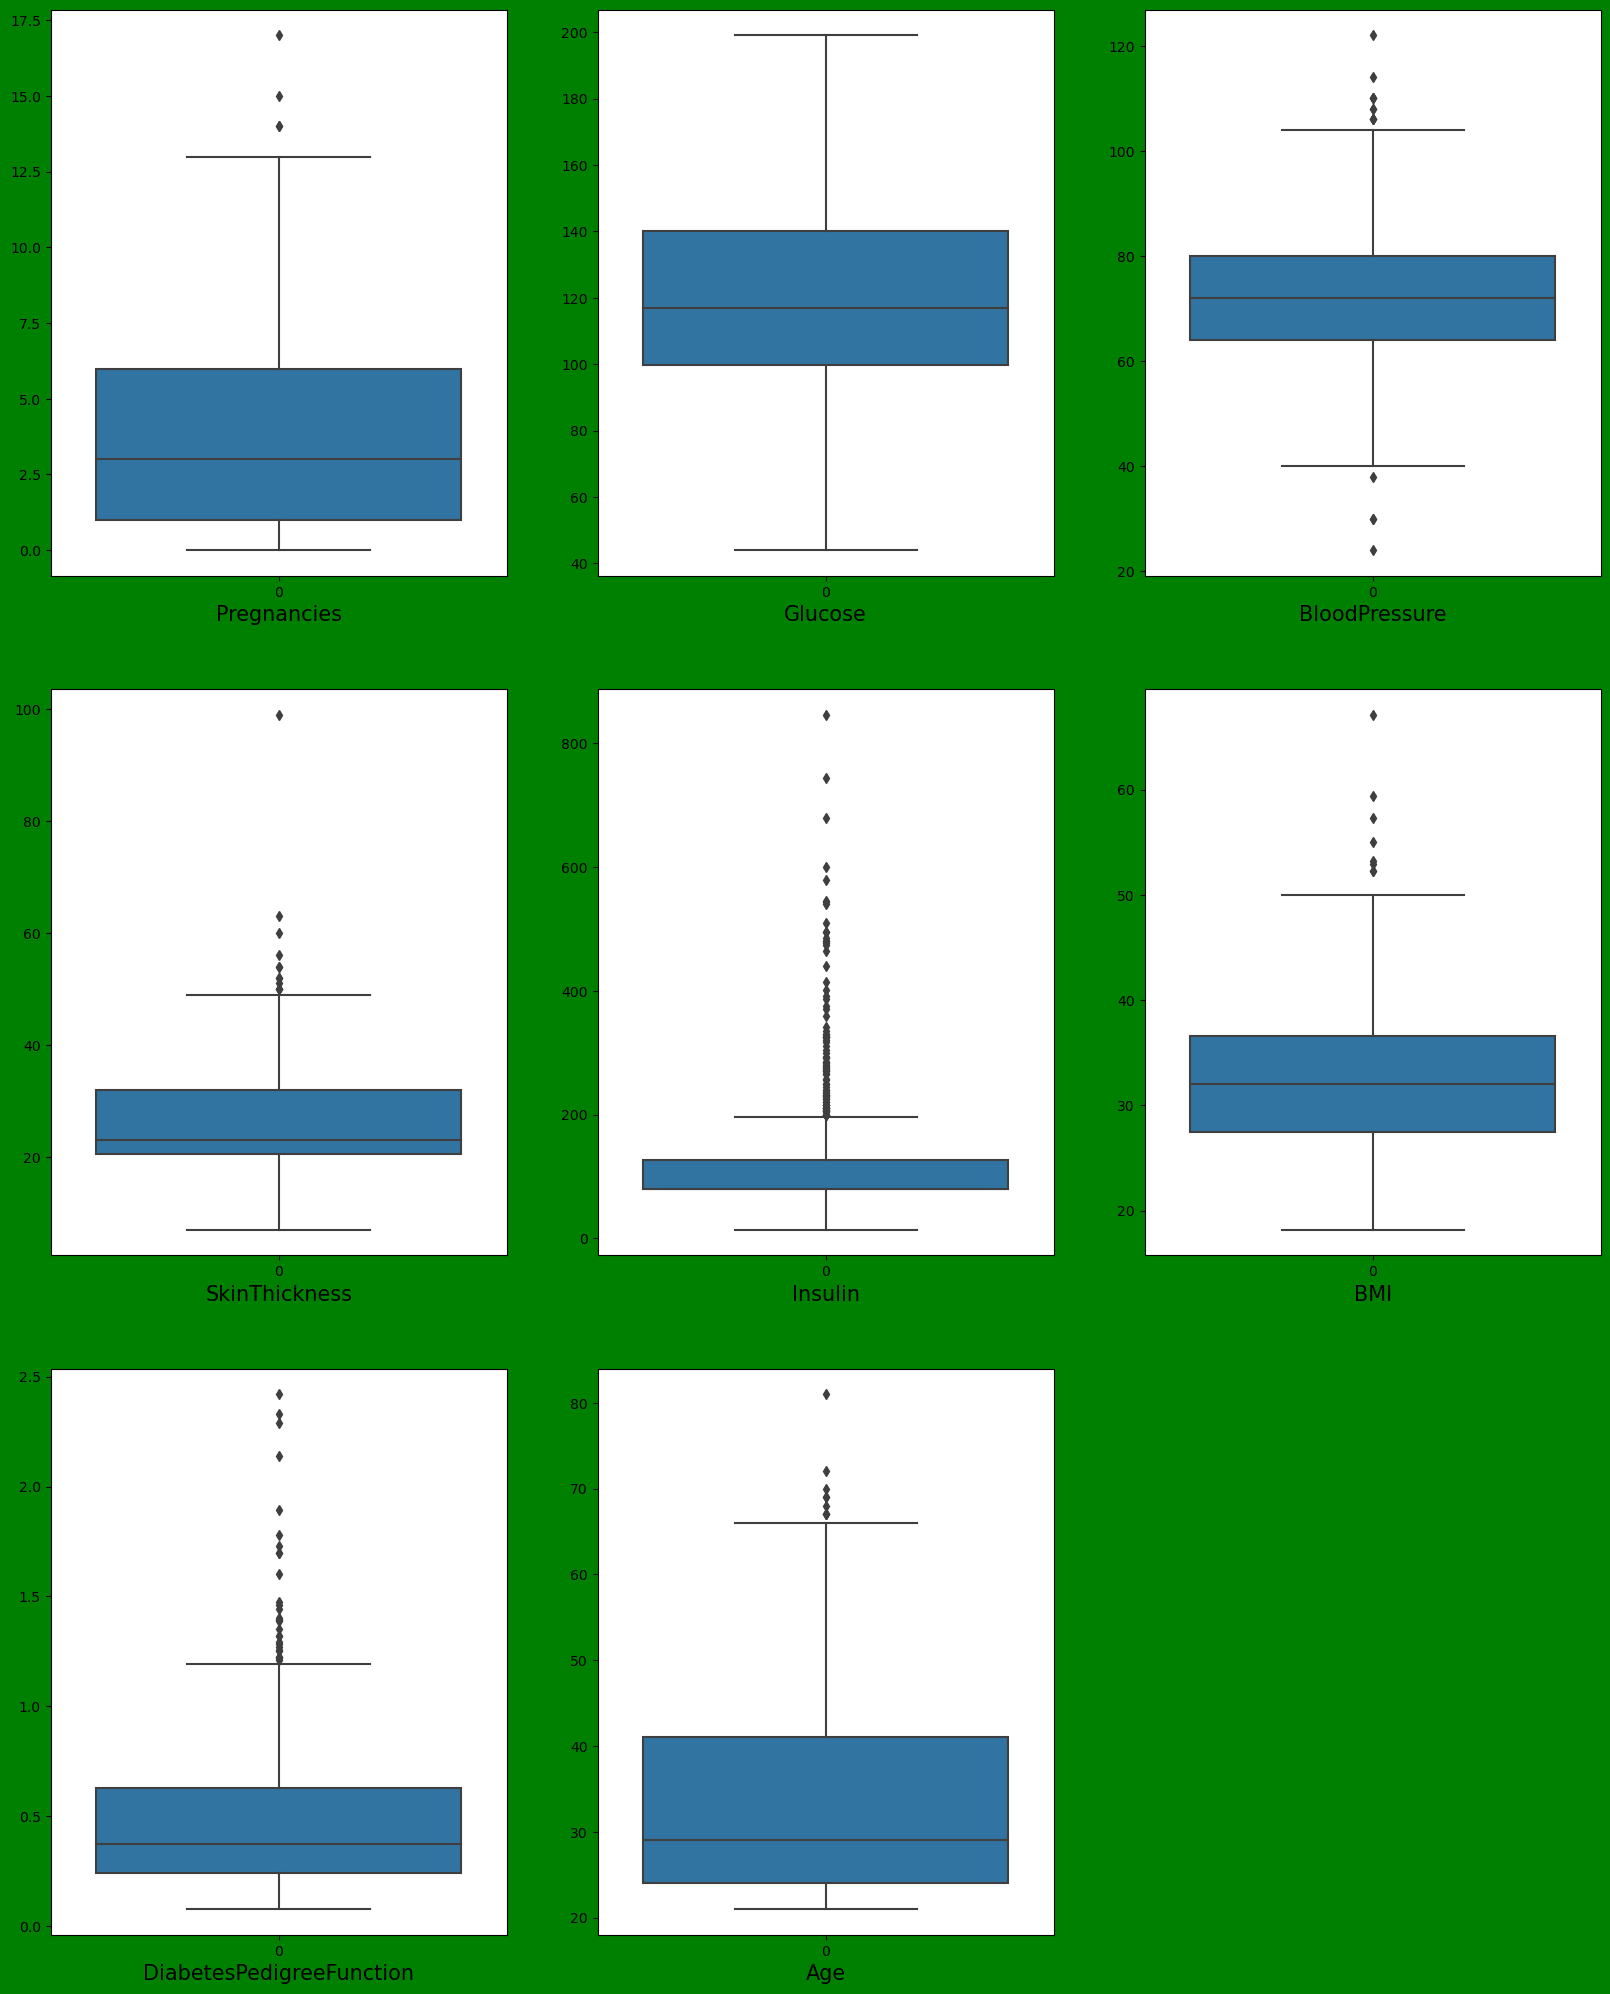

In [10]:
# Visuallize the outliers using outliers

plt.figure(figsize = (20,25), facecolor = 'Green')
graph = 1

for column in df_features:
    if graph <= 9:
        plt.subplot(3,3, graph)
        ax = sns.boxplot(data = df_features[column])
        plt.xlabel(column, fontsize = 15)
        
    graph += 1
plt.show()

In [34]:
data.shape

(768, 9)

In [11]:
# find the IQR(Inter Quantile Range) to indentify outliers

#1st quantile

q1 = data.quantile(0.25)

#3rd

q3 = data.quantile(0.75)

#IQR

iqr = q3 - q1


In [12]:
q1

Pregnancies                  1.000000
Glucose                     99.750000
BloodPressure               64.000000
SkinThickness               20.536458
Insulin                     79.799479
BMI                         27.500000
DiabetesPedigreeFunction     0.243750
Age                         24.000000
Outcome                      0.000000
Name: 0.25, dtype: float64

# **Outliers detecting formula**

**Heigher side ==> Q3 + (1.5 * IQR)**

**Lower side ==> Q1 - (1.5 * IQR)**

In [13]:
# validating one outliers
preg_high = (q3.Pregnancies + (1.5 + iqr.Pregnancies))
preg_high

12.5

In [14]:
#check the indexes which have heigher Values
np_index = np.where(data['Pregnancies'] > preg_high)
np_index

(array([ 28,  72,  86,  88, 159, 274, 298, 323, 357, 455, 518, 635, 691,
        744], dtype=int64),)

In [15]:
# Drop the index which we found in the above cell
data = data.drop(data.index[np_index])

In [16]:
# IMP We have to reset the index
data.reset_index()

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
749,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
750,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
751,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
752,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [17]:
bp_high = (q3.BloodPressure + (1.5 * iqr.BloodPressure))
print(bp_high)

np_index = np.where(data["BloodPressure"] > bp_high)

data = data.drop(data.index[np_index])
print(data.shape)

data.reset_index()

104.0
(745, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
740,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
741,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
742,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
743,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [18]:
skin_high = (q3.SkinThickness + (1.5 * iqr.SkinThickness))
print(skin_high)

np_index = np.where(data["SkinThickness"] > skin_high)

data = data.drop(data.index[np_index])
print(data.shape)

data.reset_index()

49.1953125
(734, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
729,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
730,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
731,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
732,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [19]:
insulin_high = (q3.Insulin + (1.5 * iqr.Insulin))
print(insulin_high)

np_index = np.where(data["Insulin"] > insulin_high)

data = data.drop(data.index[np_index])
print(data.shape)

data.reset_index()

198.42578125
(649, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
644,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
645,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
646,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
647,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [20]:
bmi_high = (q3.BMI + (1.5 * iqr.BMI))
print(bmi_high)

np_index = np.where(data["BMI"] > bmi_high)

data = data.drop(data.index[np_index])
print(data.shape)

data.reset_index()

50.25
(646, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
641,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
642,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
643,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
644,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [21]:
dpf_high = (q3.DiabetesPedigreeFunction + (1.5 * iqr.DiabetesPedigreeFunction))
print(dpf_high)

np_index = np.where(data["DiabetesPedigreeFunction"] > dpf_high)

data = data.drop(data.index[np_index])
print(data.shape)

data.reset_index()

1.2
(623, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...,...
618,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
619,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
620,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
621,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [22]:
age_high = q3.Age + (1.5 * iqr.Age)
print(age_high)

np_index = np.where(data["Age"] > age_high)

data = data.drop(data.index[np_index])
print(data.shape)

data.reset_index()

66.5
(614, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...,...
609,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
610,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
611,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
612,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [23]:
# Bp have both side outliers
bp_low = (q1.BloodPressure - (1.5 * iqr.BloodPressure))
print(bp_low)

np_index = np.where(data["BloodPressure"] < bp_low)

data = data.drop(data.index[np_index])
print(data.shape)

data.reset_index()

40.0
(611, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...,...
606,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
607,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
608,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
609,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


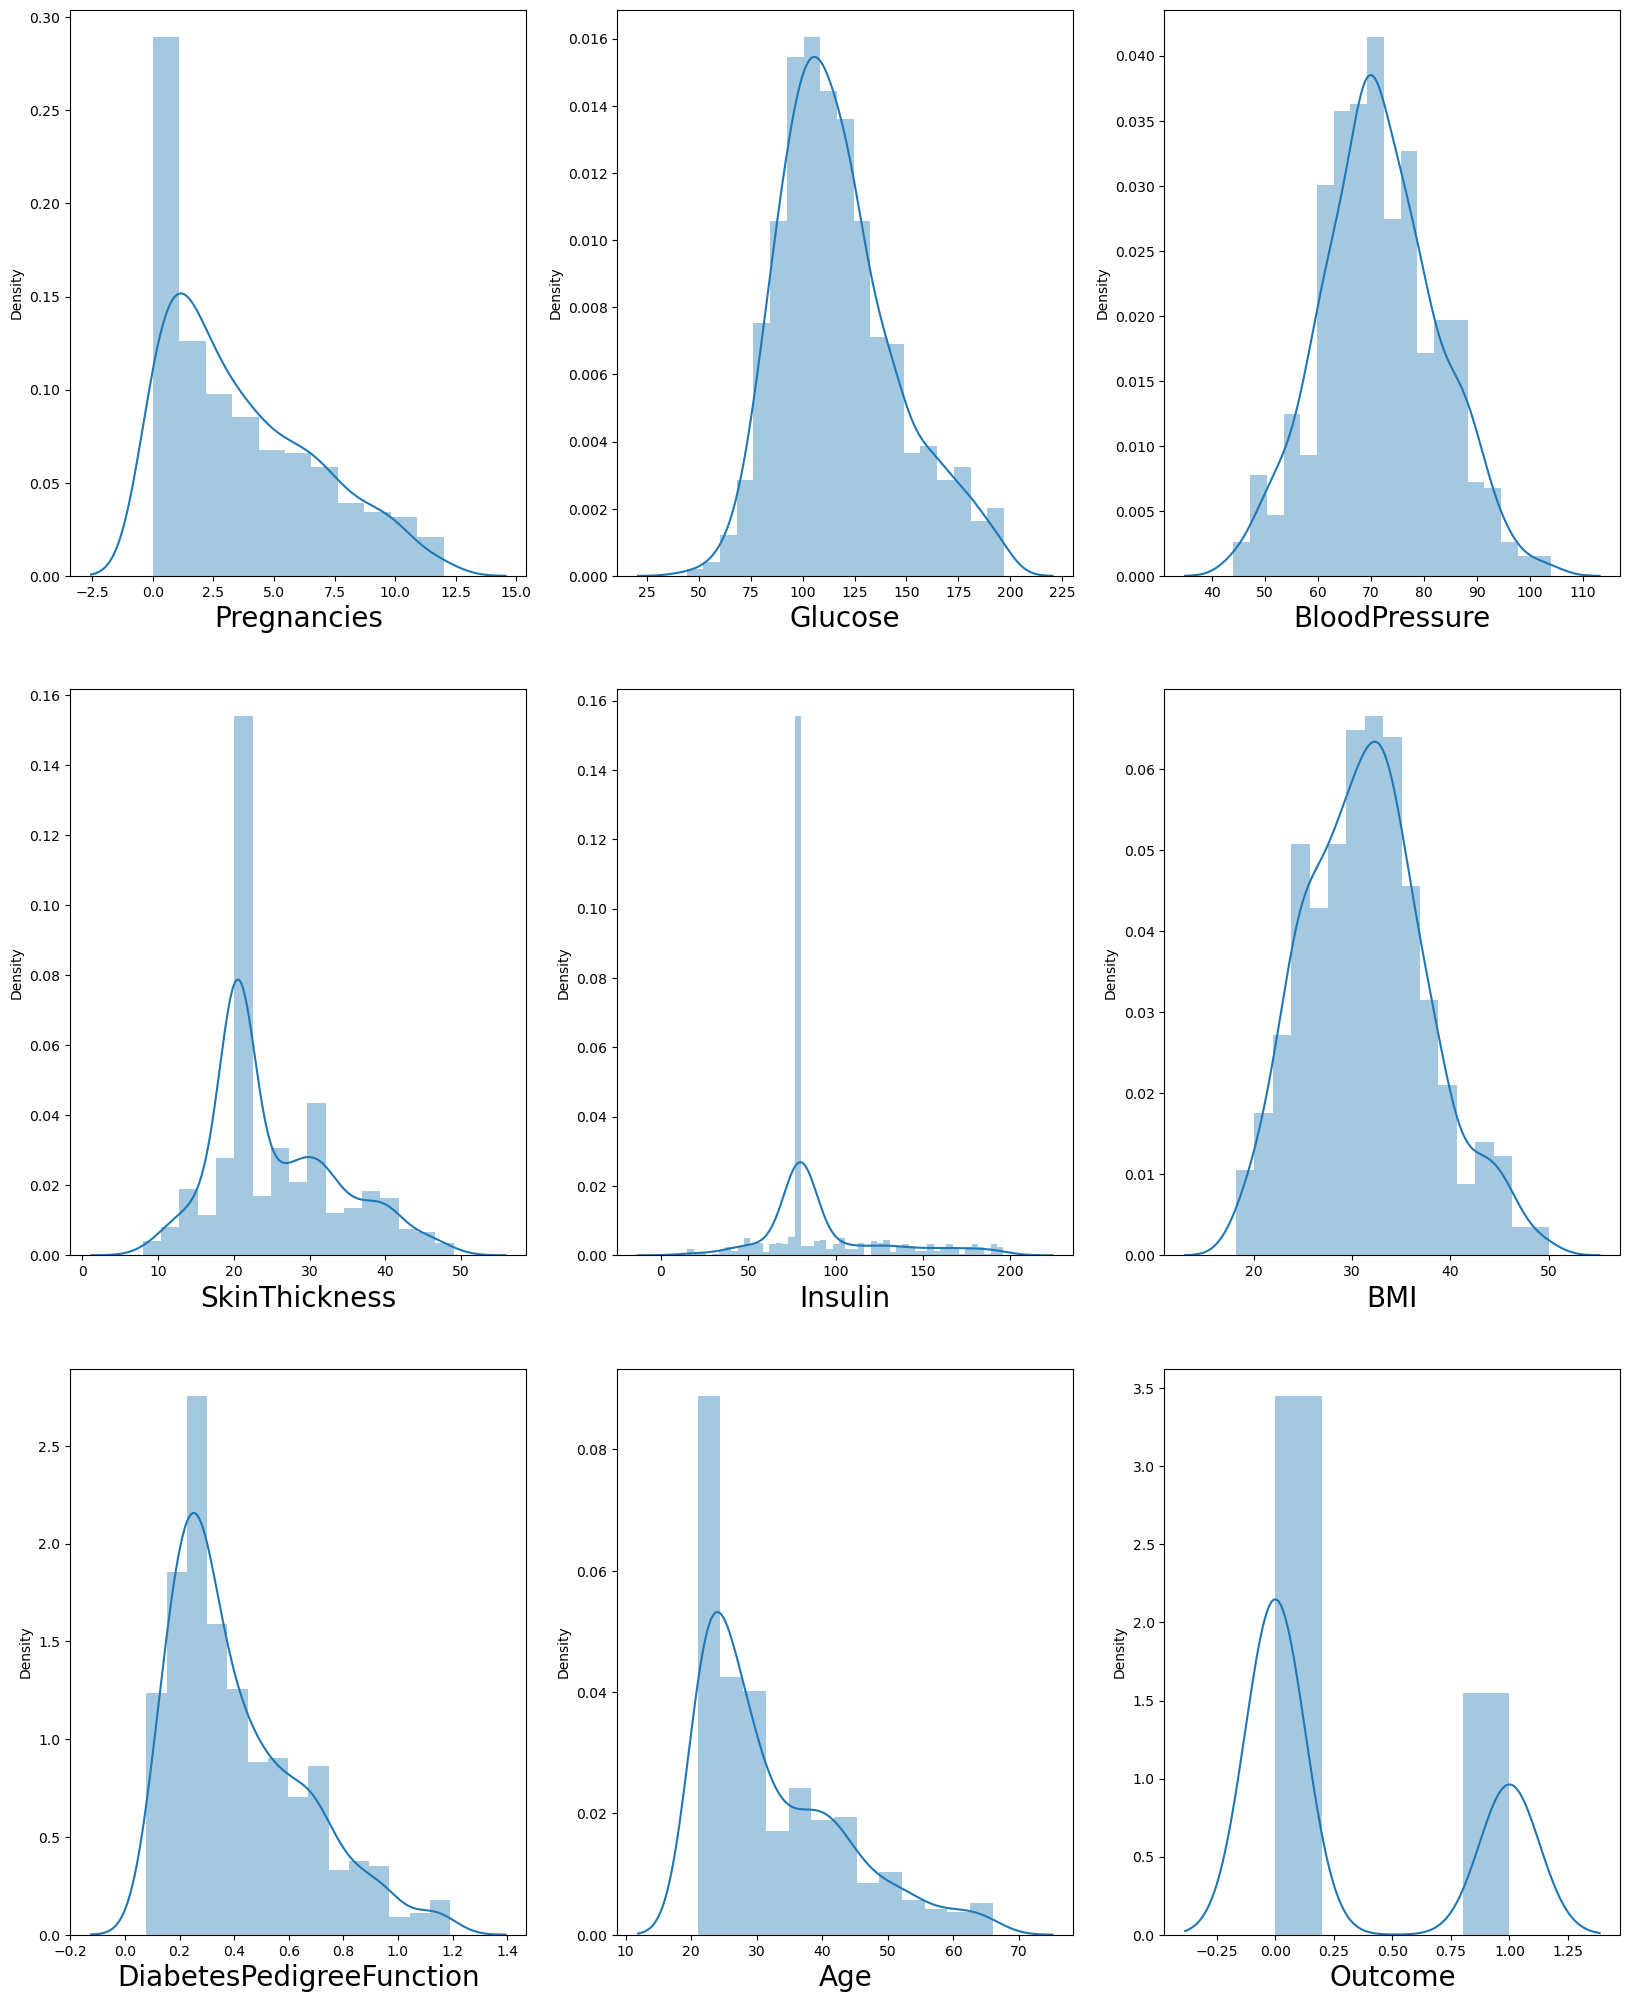

In [24]:
plt.figure(figsize = (20,25))
plotnumber = 1

for column in data:
    if plotnumber <= 9:
        ax = plt.subplot(3, 3, plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize = 20)
        
    plotnumber +=1
plt.show()

**Finding relationship we want to keep only those features which have relationship with label.**

In [36]:
x = data.drop(columns = ["Outcome"])
y = data['Outcome']

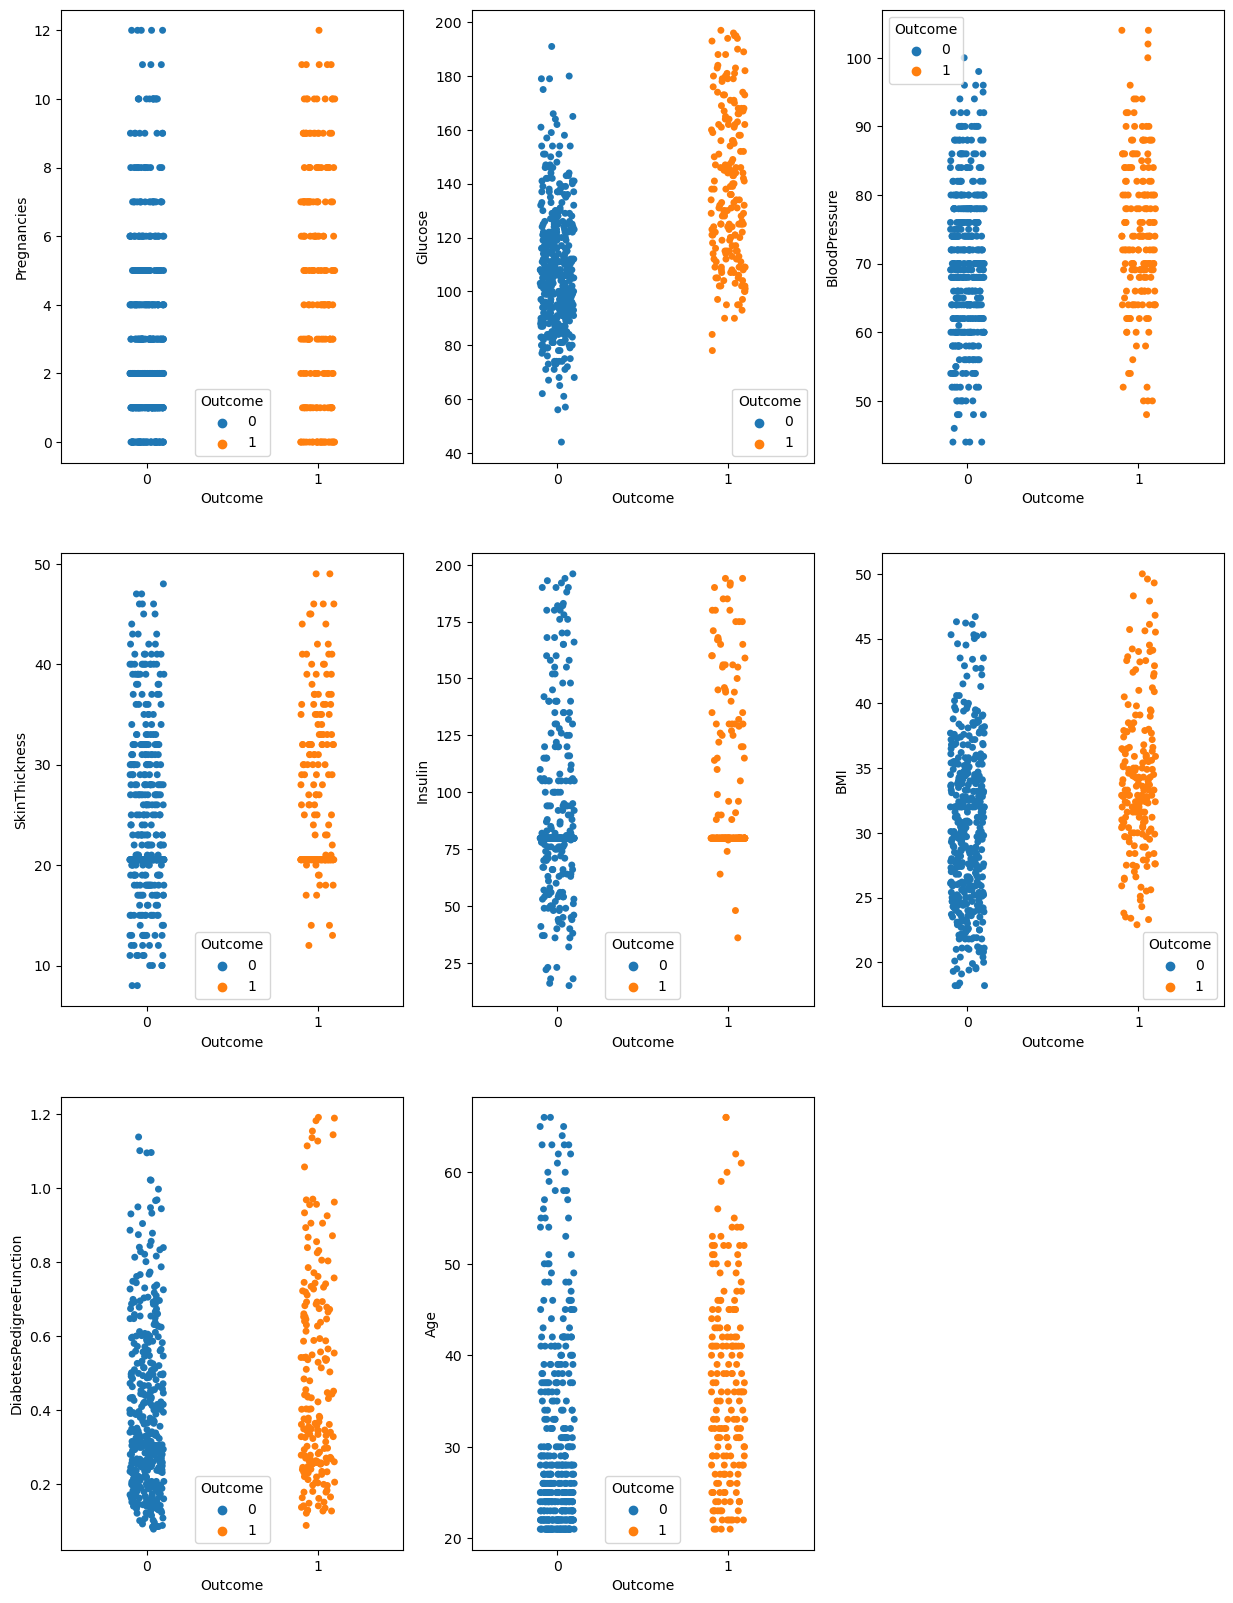

In [26]:
#lets see how feature are related to class
plt.figure(figsize = (15,20))
plotnumber = 1

for column in x:
    if plotnumber <= 9:
        ax = plt.subplot(3,3, plotnumber)
        sns.stripplot(x = y, y = x [column], hue = y)
    plotnumber += 1
plt.show()

**Check multicolinearity problem. Find if one feature is dependenton another feature.**

In [27]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [28]:
# This is how our data looks now after scaling. Now we will chaeck for multicolinearity using VIF(Variance Inflation Factor)
x_scaled.shape[1]

8

In [32]:
# Finding variance inflation factor in each scaled column i.e, x_scaled.shape[1](1/(1-R2))
vif = pd.DataFrame()

vif['VIF'] = [variance_inflation_factor(x_scaled, i) for i in range (x_scaled.shape[1])]

vif['features'] = x.columns

# lets check the value
vif

,VIF,features
0,1.435936,Pregnancies
1,1.251851,Glucose
2,1.255124,BloodPressure
3,1.424986,SkinThickness
4,1.204047,Insulin
5,1.461057,BMI
6,1.037368,DiabetesPedigreeFunction
7,1.648565,Age


All the VIF values are less than 5 and are very low. That means no multicolinearity

In [46]:
# Train test split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.25, random_state = 255)

# Pre-processing steps completed

Model Building

In [47]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

lets see how well aor model perform on the test dataset

In [49]:
y_pred = log_reg.predict(x_test)

In [50]:
y_pred

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0],
      dtype=int64)

In [53]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[94, 10],
       [24, 25]], dtype=int64)

In [54]:
# Model Accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7777777777777778

In [58]:
"""This reprt contains all of them internally what the repot will do, it'll find out everything
precision, accuracy, recall, and its create a report an give to us.""" 

from sklearn.metrics import classification_report

In [59]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       104
           1       0.71      0.51      0.60        49

    accuracy                           0.78       153
   macro avg       0.76      0.71      0.72       153
weighted avg       0.77      0.78      0.77       153



In [60]:
# ROC curve
fpr,tpr,thresholds = roc_curve(y_test, y_pred)

In [61]:
# thresholds [0] means no instances predicted (it should be read from 0-max)
print('Threshold =', thresholds)
print('False Positive Rate =', fpr)
print('True positive Rate =', tpr)

Threshold = [inf  1.  0.]
False Positive Rate = [0.         0.09615385 1.        ]
True positive Rate = [0.         0.51020408 1.        ]


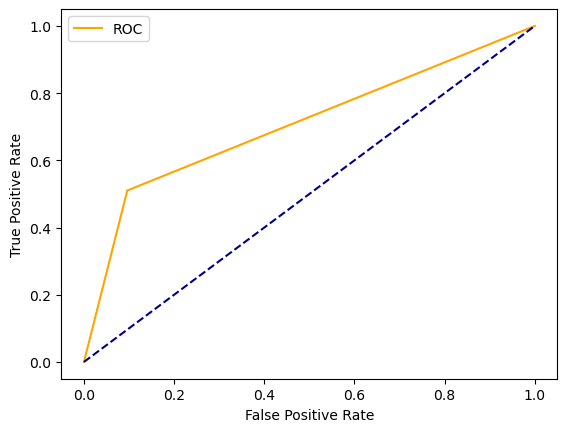

In [66]:
plt.plot(fpr, tpr, color = "orange", label = 'ROC')
plt.plot([0,1], [0,1], color = 'darkblue', linestyle = '--')
plt.xlabel('False Positive Rate')
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

In [69]:
# How much area it is covering (AUC)
auc_score = roc_auc_score(y_test, y_pred)
print(auc_score)
# this model with heighest Auc value will be the best model to use

0.7070251177394035
